In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

* Nothing to see in this cell.  Just making up some data for us.

In [4]:
np.random.seed(42)

n = 500
x1_x2_params = [((5, 2), (0, 2)), ((5, 2), (5, 2)), ((0, 2), (0, 2))]

dfs = []
for i, (x1_params, x2_params) in enumerate(x1_x2_params):
    x1_mean, x1_std = x1_params
    x2_mean, x2_std = x2_params

    x1 = np.random.normal(x1_mean, x1_std, n)
    x2 = np.random.normal(x2_mean, x2_std, n)

    df = pd.DataFrame({"x1": x1, "x2": x2})
    df["label"] = i

    dfs.append(df)

df = pd.concat(dfs)

<IPython.core.display.Javascript object>

With the data stored in `df` we want to predict the `label` given the 2 features `x1` & `x2`.  With this goal in mind, explore the data.

* Create a new column that holds a string version of the class labels

In [6]:
df["label_str"] = "Class " + df["label"].astype(str)

<IPython.core.display.Javascript object>

* Create a pairplot/scatter matrix of the features colored by the label
* According to this output, which classes do you think will be the easiest to tell apart? the hardest?

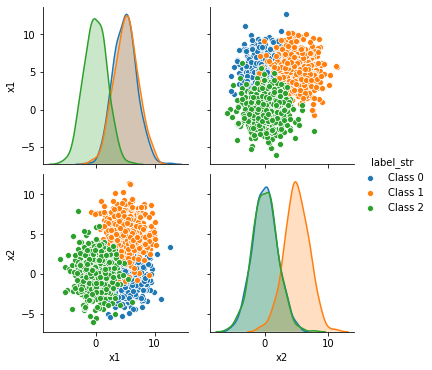

<IPython.core.display.Javascript object>

In [8]:
plot_df = df.drop(columns="label")
sns.pairplot(plot_df, hue="label_str")

* Separate the data into `X` and `y` and perform a train test split

In [9]:
X = df[["x1", "x2"]]
y = df["label"]

<IPython.core.display.Javascript object>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

* Fit a logistic regression model to the data

In [20]:
model = LogisticRegression(multi_class="ovr")
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

* Report the accuracy.  Are we overfitting? underfitting?

In [23]:
model.score(X_train, y_train)

0.8616666666666667

<IPython.core.display.Javascript object>

In [24]:
model.score(X_test, y_test)

0.8833333333333333

<IPython.core.display.Javascript object>

* Use the `plot_decision_regions` function to... plot the decision regions

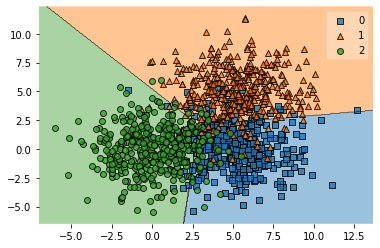

<IPython.core.display.Javascript object>

In [25]:
plot_decision_regions(X_train.values, y_train.values, model)
plt.show()

* Generate a confusion matrix for the model on the test set


* What mistake did your model make the most?
* Which class did it perform the worst on?
* Which 2 classes were the most likely to be mistaken?
* Which 2 classes were the least likely to be mistaken?

In [29]:
y_pred = model.predict(X_test)

<IPython.core.display.Javascript object>

In [27]:
y_prob = model.predict_proba(X_test)
pd.DataFrame(y_prob)

,0,1,2
0,0.167413,0.000724,0.831863
1,0.017277,0.009453,0.973270
2,0.884744,0.057393,0.057863
3,0.425537,0.574340,0.000123
4,0.854591,0.144225,0.001184
...,...,...,...
295,0.020986,0.974529,0.004484
296,0.117115,0.881794,0.001091
297,0.275904,0.161416,0.562680
298,0.199930,0.000475,0.799594


<IPython.core.display.Javascript object>

In [31]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,82,13,9
1,5,81,0
2,8,0,102


<IPython.core.display.Javascript object>

* Display a `classification_report`

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       104
           1       0.86      0.94      0.90        86
           2       0.92      0.93      0.92       110

    accuracy                           0.88       300
   macro avg       0.88      0.89      0.88       300
weighted avg       0.88      0.88      0.88       300



<IPython.core.display.Javascript object>

* Predict the probability of each observation belonging to each class
* Put this info in a dataframe

In [35]:
y_prob = model.predict_proba(X_test)
prob_df = pd.DataFrame(
    y_prob, columns=["prob_0", "prob_1", "prob_2"], index=y_test.index
)
prob_df

,prob_0,prob_1,prob_2
116,0.167413,0.000724,0.831863
368,0.017277,0.009453,0.973270
422,0.884744,0.057393,0.057863
413,0.425537,0.574340,0.000123
451,0.854591,0.144225,0.001184
...,...,...,...
483,0.020986,0.974529,0.004484
299,0.117115,0.881794,0.001091
265,0.275904,0.161416,0.562680
150,0.199930,0.000475,0.799594


<IPython.core.display.Javascript object>

* Add a column for each label that indicates `1` if the actually observation belongs to that class and a `0` otherwise

In [38]:
prob_df["is_0"] = (y_test == 0).astype(int)
prob_df["is_1"] = (y_test == 1).astype(int)
prob_df["is_2"] = (y_test == 2).astype(int)
prob_df.head()

,prob_0,prob_1,prob_2,is_0,is_1,is_2
116,0.167413,0.000724,0.831863,0,0,1
368,0.017277,0.009453,0.973270,0,0,1
422,0.884744,0.057393,0.057863,1,0,0
413,0.425537,0.574340,0.000123,1,0,0
451,0.854591,0.144225,0.001184,1,0,0


<IPython.core.display.Javascript object>

* Generate a ROC Curve and AUC Score for the 0 class


* We're going to calculate this for every class below.  How do you expect the other classes AUC and ROC to differ from class 0?

In [40]:
fpr, tpr, thresholds = roc_curve(prob_df["is_0"], prob_df["prob_0"])

<IPython.core.display.Javascript object>

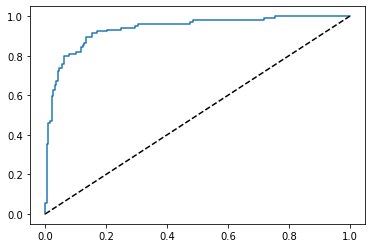

<IPython.core.display.Javascript object>

In [42]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "--", c="black")

* Use a `for` loop enerate a ROC Curve and AUC Score for all classes (show all ROC curves in the same plot).

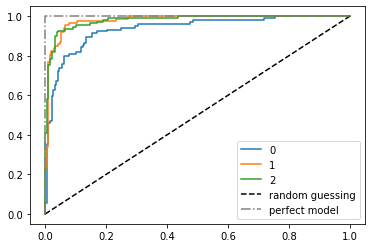

<IPython.core.display.Javascript object>

In [44]:
for label in [0, 1, 2]:
    fpr, tpr, thresholds = roc_curve(prob_df[f"is_{label}"], prob_df[f"prob_{label}"])
    plt.plot(fpr, tpr, label=label)

plt.plot([0, 1], [0, 1], "--", c="black", label="random guessing")
plt.plot([0, 0, 1], [0, 1, 1], "-.", c="gray", label="perfect model")
plt.legend()

plt.show()